In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pickle
import numpy as np 

In [2]:
def plot_psid_results(exp):
    with open('results/psid_' + exp + '_acc.pickle', 'rb') as handle:
        bscores, bscores_f = pickle.load(handle)

    #print(bscores_f[0])
    #fig, axs = plt.subplots(2)

    
    print("PSID - mean accuracy :  ",np.mean(bscores[0]))

    #print("PSID - mean accuracy (filtered data) : ", np.mean(bscores_f[0]))
    plt.boxplot(bscores[0])
    plt.show()
    print("PSID - XGB FEATURE IMPORTANCE")
    
    for i in range(len(bscores[1])):
        plt.imshow(bscores[1][i].reshape((7,20)))
        plt.show()

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

In [8]:
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score
def auc_scoring(y, y_pred):
    auc_threshold = np.median(y)
    print(auc_threshold)
    ix_true = np.where(y > auc_threshold)[0]
    y_binary = np.zeros(y.shape)
    y_binary[ix_true] = 1
    score = roc_auc_score(y_binary, y_pred - auc_threshold)
    print()
    return score
sys.path.append("..")
from utils.utils import block_crossval

In [11]:
def psid_classification(exp,
                       metric = roc_auc_score,
                       freq_buckets = [0,1,2,3,4,5,6],
                       psid_dims = list(range(20)),
                       filtered = "_filtered"
                       ):
    metric = roc_auc_score #accuracy_score #auc_scoring

    with open('results/psid_'+exp+filtered+'.pickle', 'rb') as handle:
        X, y, blocks_idx = pickle.load(handle)
    nb_obs = X.shape[0]
    #print(X.shape)
    X = X.reshape((nb_obs,7,20))
    #print(X.shape)
    X = X[:, freq_buckets , :] 
    #print(X.shape)
    X = X[:,:,psid_dims]
    #print(X.shape)
    X = X.reshape((nb_obs,-1))
    #print(X.shape)

    crossval_res = block_crossval(X, y, model, blocks_idx, 
                                  metric = metric,
                                  do_plot=True, 
                                  do_feature_imp=False)

    return crossval_res

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Scores: [0.9583333333333333, 0.8888888888888888, 0.9027777777777778, 0.9027777777777778, 0.986111111111111] - 92.78%


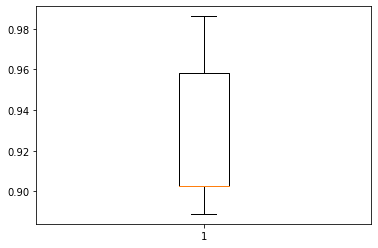

0.9583333333333333
PSID - XGB FEATURE IMPORTANCE


TypeError: object of type 'numpy.float64' has no len()

In [12]:
freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp="1",
                         metric=roc_auc_score,)
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")


Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Scores: [0.9861111111111112, 0.9583333333333333, 0.9166666666666667, 0.875, 0.9444444444444444] - 93.61%


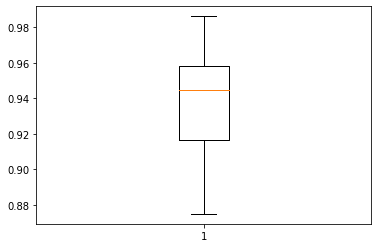

0.9361111111111111
PSID - XGB FEATURE IMPORTANCE


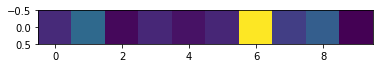

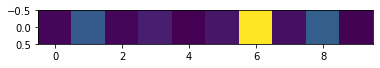

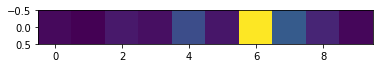

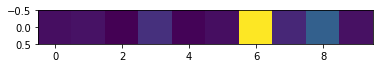

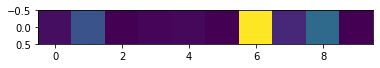

In [34]:
freq_buckets = [4]
psid_dims = list(range(5,15))
res = psid_classification(exp="1",
                         metric=roc_auc_score,
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Scores: [0.9166666666666666, 0.8333333333333334, 0.7638888888888888, 0.8333333333333333, 0.5972222222222222] - 78.89%


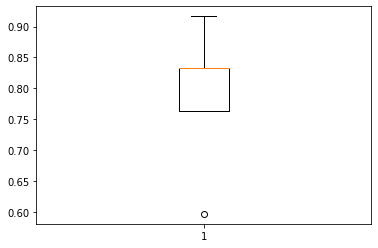

0.9166666666666666
PSID - XGB FEATURE IMPORTANCE


In [13]:
freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp="2",
                         metric=roc_auc_score,)
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")


Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Scores: [0.8472222222222222, 0.7777777777777777, 0.8055555555555556, 0.8611111111111112, 0.8611111111111112] - 83.06%


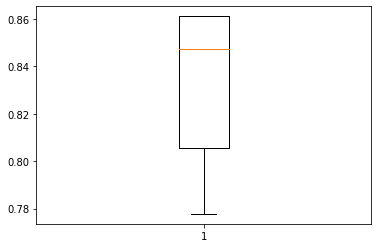

0.8305555555555555
PSID - XGB FEATURE IMPORTANCE


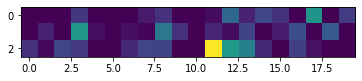

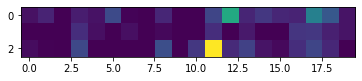

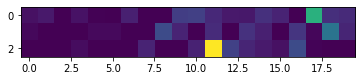

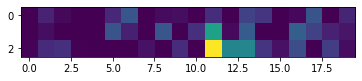

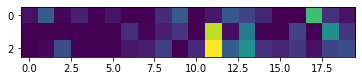

In [37]:
freq_buckets = [0,1,4]
psid_dims = list(range(20))
res = psid_classification(exp="2",
                         metric=roc_auc_score,
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()

Not all the same number of groups per label - will zip and thus drop all groups longer than the min
Processing split 1
Processing split 2
Processing split 3
Scores: [0.75, 0.888888888888889, 0.6805555555555554] - 77.31%


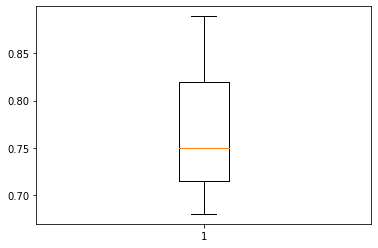

0.773148148148148
PSID - XGB FEATURE IMPORTANCE


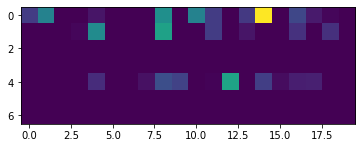

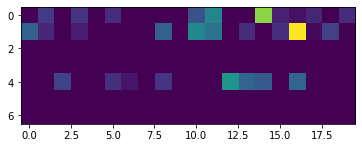

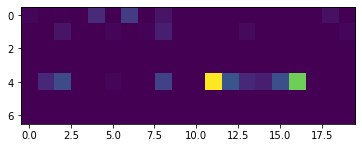

Not all the same number of groups per label - will zip and thus drop all groups longer than the min
Processing split 1
Processing split 2
Processing split 3
Scores: [0.75, 0.888888888888889, 0.6805555555555554] - 77.31%


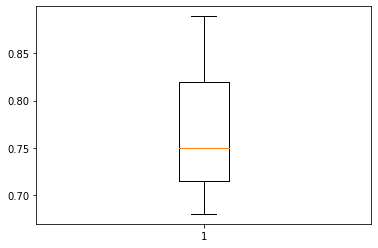

0.773148148148148


In [39]:
exp = "3"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,)
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [0,1,4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))


Not all the same number of groups per label - will zip and thus drop all groups longer than the min
Processing split 1
Processing split 2
Processing split 3
Processing split 4
Scores: [0.9305555555555556, 1.0, 0.9166666666666667, 0.9166666666666666] - 94.10%


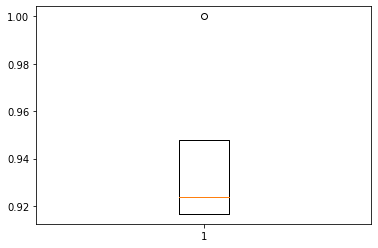

0.9409722222222222
PSID - XGB FEATURE IMPORTANCE


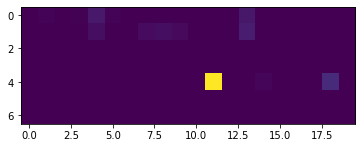

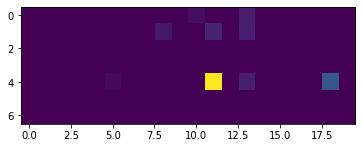

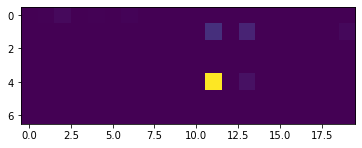

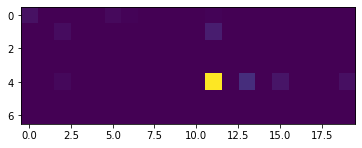

Not all the same number of groups per label - will zip and thus drop all groups longer than the min
Processing split 1
Processing split 2
Processing split 3
Processing split 4
Scores: [0.9444444444444444, 0.9861111111111112, 0.9305555555555556, 0.888888888888889] - 93.75%


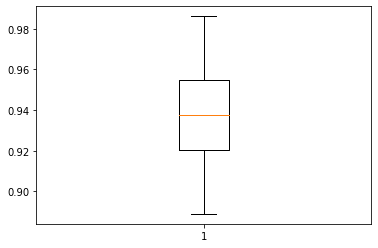

0.9375


In [40]:
exp = "4"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,)
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))


Not all the same number of groups per label - will zip and thus drop all groups longer than the min
Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Scores: [0.6944444444444444, 0.9583333333333333, 0.9027777777777778, 0.9444444444444445, 0.9444444444444444] - 88.89%


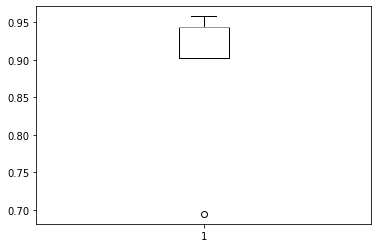

0.888888888888889
PSID - XGB FEATURE IMPORTANCE


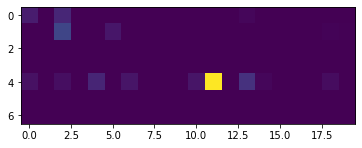

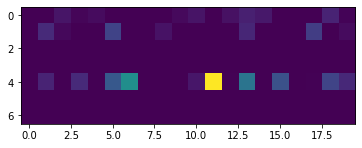

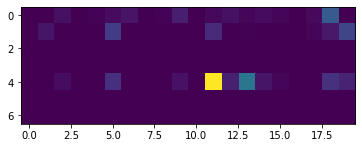

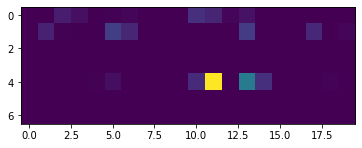

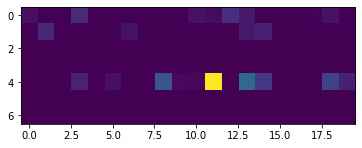

Not all the same number of groups per label - will zip and thus drop all groups longer than the min
Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Scores: [0.6527777777777778, 0.9722222222222222, 0.9027777777777778, 0.9305555555555555, 0.8472222222222223] - 86.11%


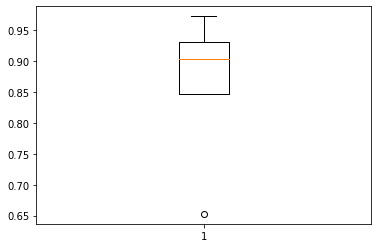

0.861111111111111


In [10]:
exp = "5"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         filtered = "")
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                          filtered = "",
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Processing split 9
Scores: [0.9583333333333333, 0.9583333333333333, 1.0, 0.9722222222222222, 1.0, 0.9722222222222222, 1.0, 1.0, 0.986111111111111] - 98.30%


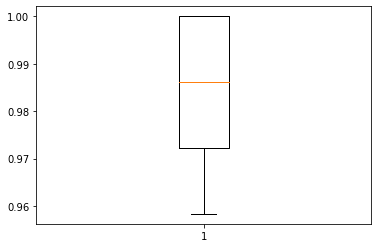

0.9830246913580246
PSID - XGB FEATURE IMPORTANCE


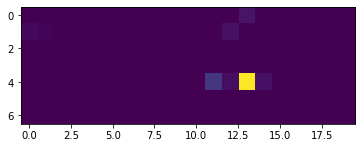

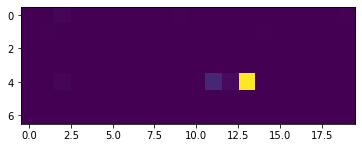

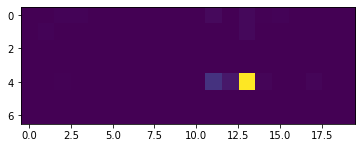

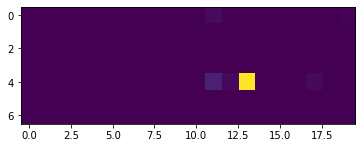

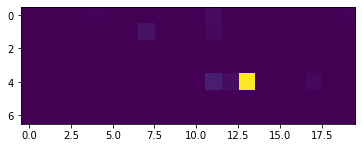

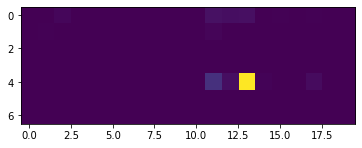

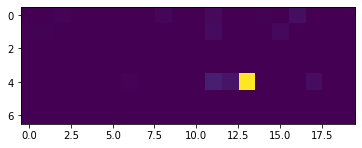

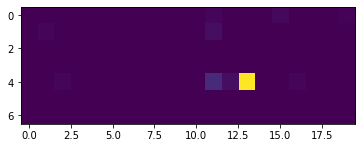

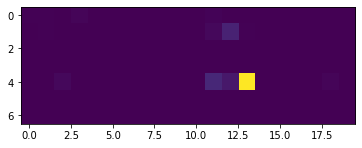

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Processing split 9
Scores: [0.9583333333333333, 0.9444444444444445, 1.0, 0.9722222222222222, 1.0, 0.9722222222222222, 1.0, 1.0, 1.0] - 98.30%


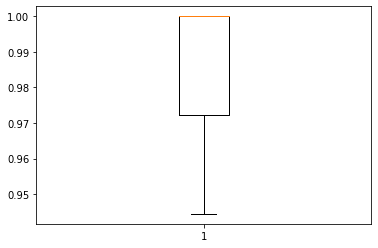

0.9830246913580246


In [12]:
exp = "6"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         #filtered = ""
                         )
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                          #filtered = "",
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Scores: [0.8194444444444444, 0.9583333333333333, 0.875, 0.9305555555555554, 0.8611111111111112, 0.9444444444444444, 0.8611111111111112] - 89.29%


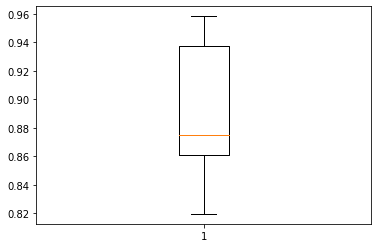

0.8928571428571429
PSID - XGB FEATURE IMPORTANCE


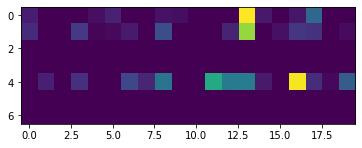

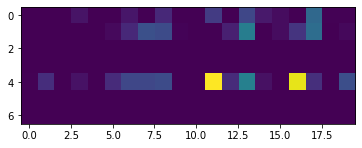

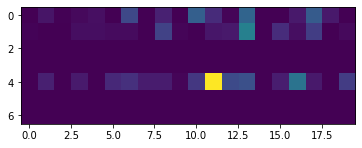

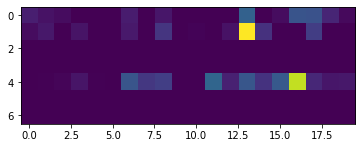

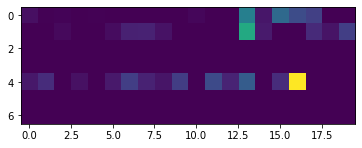

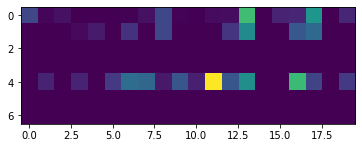

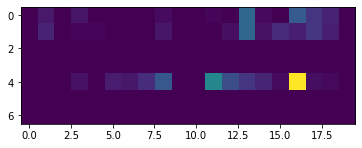

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Scores: [0.8194444444444444, 0.9583333333333333, 0.875, 0.9305555555555554, 0.8611111111111112, 0.9444444444444444, 0.8611111111111112] - 89.29%


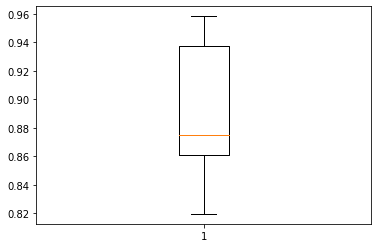

0.8928571428571429


In [15]:
exp = "7"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         #filtered = ""
                         )
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [0,1,4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                          #filtered = "",
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Processing split 9
Scores: [0.726010101010101, 0.8333333333333333, 0.8333333333333333, 0.9305555555555556, 0.7916666666666665, 0.8194444444444444, 0.9166666666666666, 0.9027777777777778, 0.9166666666666667] - 85.23%


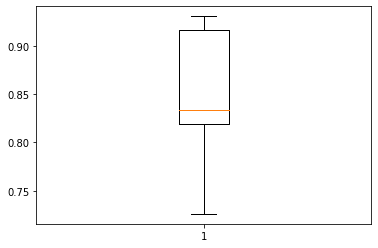

0.8522727272727273
PSID - XGB FEATURE IMPORTANCE


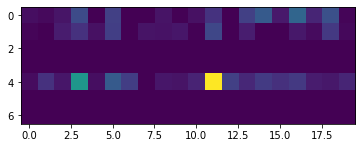

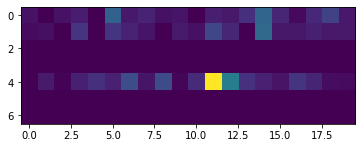

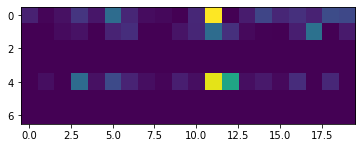

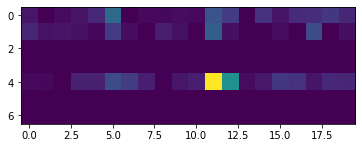

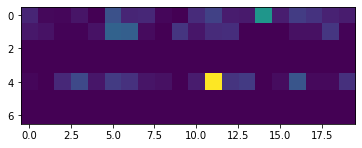

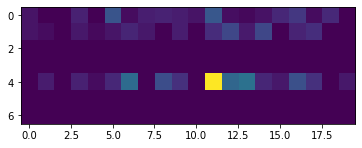

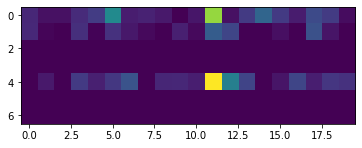

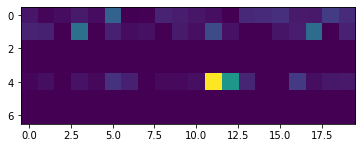

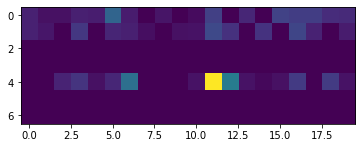

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Processing split 9
Scores: [0.726010101010101, 0.8333333333333333, 0.8333333333333333, 0.9305555555555556, 0.7916666666666665, 0.8194444444444444, 0.9166666666666666, 0.9027777777777778, 0.9166666666666667] - 85.23%


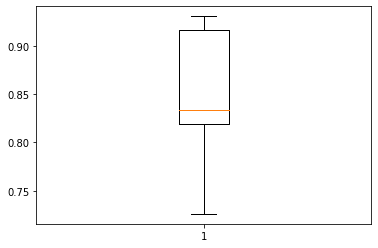

0.8522727272727273


In [18]:
exp = "8"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         filtered = ""
                         )
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [0,1,4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                        filtered = "",
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Scores: [0.9027777777777778, 0.875, 0.9305555555555556, 0.9027777777777778, 0.9027777777777778, 0.8194444444444444, 0.861111111111111, 0.9444444444444444] - 89.24%


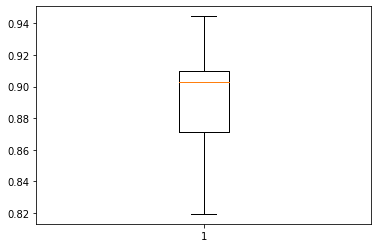

0.8923611111111112
PSID - XGB FEATURE IMPORTANCE


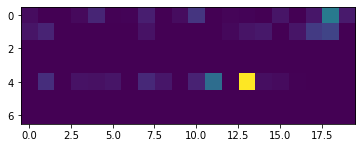

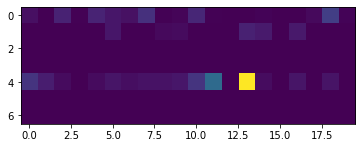

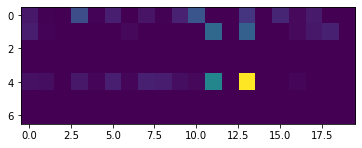

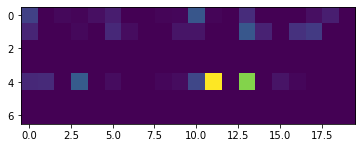

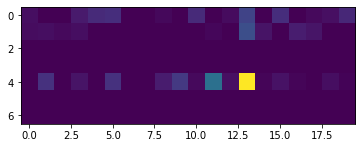

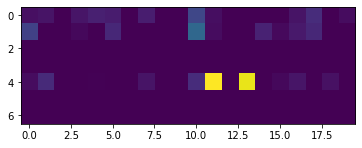

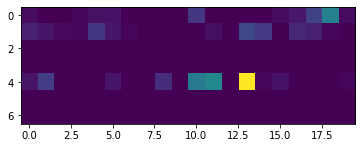

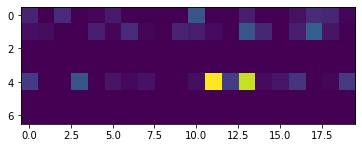

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Scores: [0.9027777777777778, 0.875, 0.9305555555555556, 0.9027777777777778, 0.9027777777777778, 0.8194444444444444, 0.861111111111111, 0.9444444444444444] - 89.24%


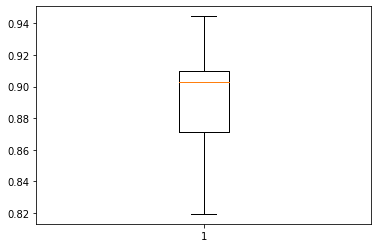

0.8923611111111112


In [19]:
exp = "9"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         filtered = ""
                         )
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [0,1,4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                        filtered = "",
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Scores: [0.9305555555555556, 0.9444444444444444, 0.986111111111111, 0.9583333333333333, 0.9444444444444444, 0.9027777777777777, 0.8472222222222222, 0.9444444444444444] - 93.23%


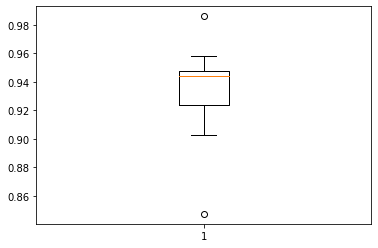

0.9322916666666665
PSID - XGB FEATURE IMPORTANCE


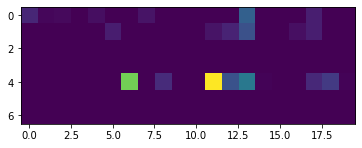

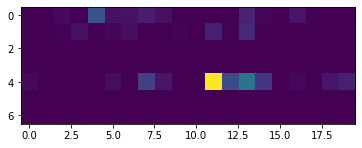

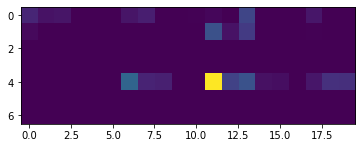

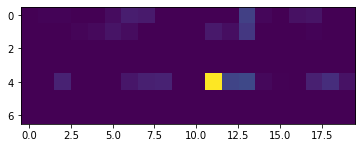

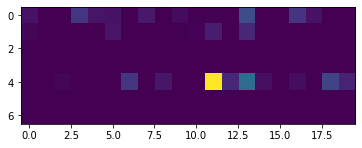

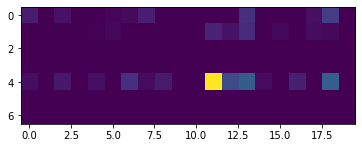

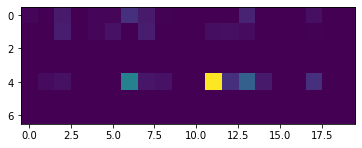

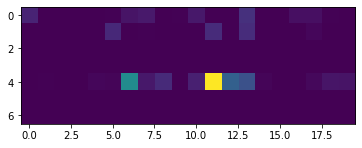

Processing split 1
Processing split 2
Processing split 3
Processing split 4
Processing split 5
Processing split 6
Processing split 7
Processing split 8
Scores: [0.9305555555555556, 0.9444444444444444, 0.986111111111111, 0.9583333333333333, 0.9444444444444444, 0.9027777777777777, 0.8472222222222222, 0.9444444444444444] - 93.23%


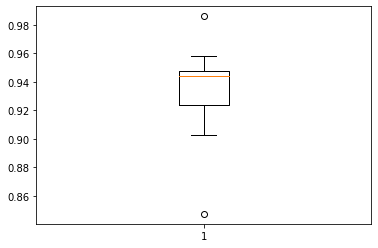

0.9322916666666665


In [22]:
exp = "10"

freq_buckets = [0,1,2,3,4,5,6]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                         filtered = ""
                         )
print(np.mean(res[0]))
print("PSID - XGB FEATURE IMPORTANCE")

for i in range(len(res[1])):
    plt.imshow(res[1][i].reshape((len(freq_buckets),len(psid_dims))))
    plt.show()
    
freq_buckets = [0,1,4]
psid_dims = list(range(20))
res = psid_classification(exp,
                         metric=roc_auc_score,
                        filtered = "",
                         freq_buckets = freq_buckets,
                         psid_dims = psid_dims)
print(np.mean(res[0]))